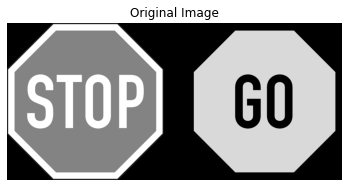

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

# Read Gray Image
img = cv2.imread('artifacts/sign.png',0)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()


In [3]:
# Contour is basically a curve which joins set of points in an area which have similar color intensity 
	
# Find contours
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print('Number of contours: ',len(contours))


Number of contours:  2


(479, 1024, 3)


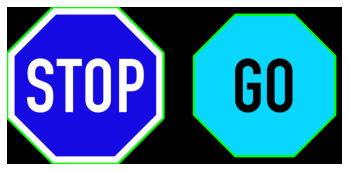

In [4]:
# Draw Contours

# Read image in color mode
img2 = cv2.imread('artifacts/sign.png')
print(img2.shape)
cv2.drawContours(img2,contours,-1,(0,255,0),5)
plt.imshow(img2)
plt.axis('off')
plt.show()


In [5]:
# Make a function to visulize the image

def show_image(img,cmap=None):
    plt.figure(figsize=(10,10))
    plt.imshow(img,cmap=cmap)
    plt.axis('off')
    plt.show()

# Preprocssing for Contours

## Thresholding 

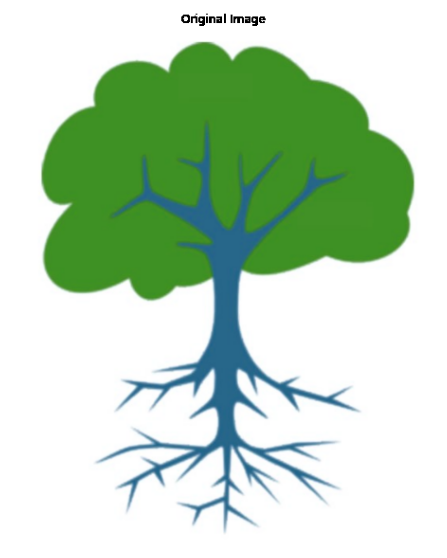

In [7]:


img = cv2.imread('artifacts/tree.png')

show_image(img)

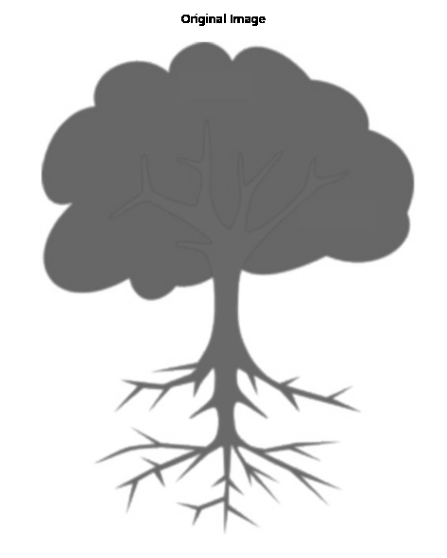

In [8]:
# Convert it into gray scale

gray_tree = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

show_image(gray_tree,cmap='gray')

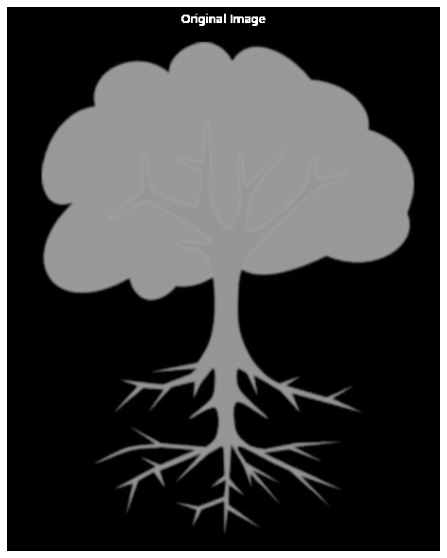

In [10]:

# We have to invert the colors because contours need foregroud an white and background as black
# so we will invert the color by using cv2 function

gray_inv = cv2.bitwise_not(gray_tree)
show_image(gray_inv,cmap='gray')

In [11]:
# Find contours
contours, hierarchy = cv2.findContours(gray_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print('Number of contours: ',len(contours))

Number of contours:  59


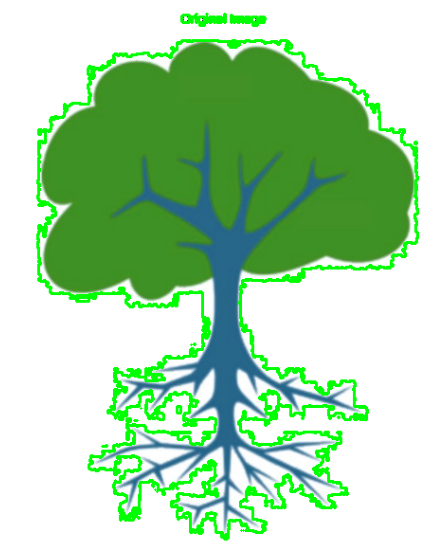

In [12]:
# Draw contours

img_cpy = img.copy()

cv2.drawContours(img_cpy,contours,-1,(0,255,0),2)

show_image(img_cpy)

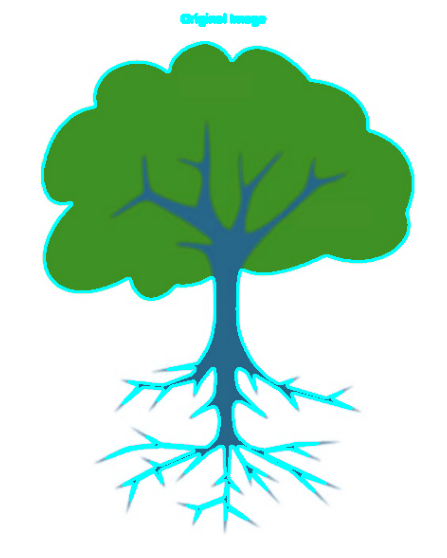

In [14]:
# Apply Thresholding

_, binary = cv2.threshold(gray_inv,100,255, cv2.THRESH_BINARY)

# find contours
contours, _ = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

img_cpy2= img.copy()

cv2.drawContours(img_cpy2,contours,-1,(0,255,255),2)
show_image(img_cpy2)

## Edge Detection

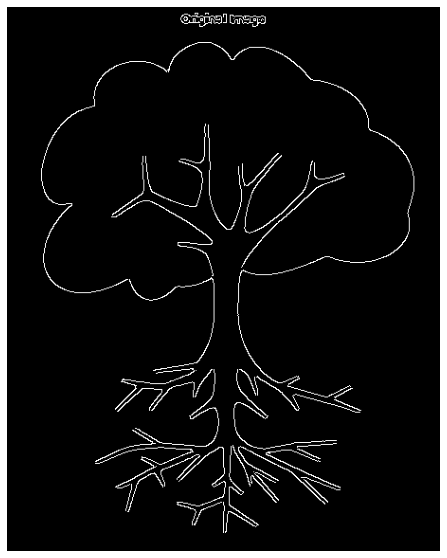

In [16]:
# Apply blur

blur = cv2.GaussianBlur(img,(5,5),0)

# Apply canny for edge detection
edges = cv2.Canny(blur,100,160)

show_image(edges,cmap='gray')

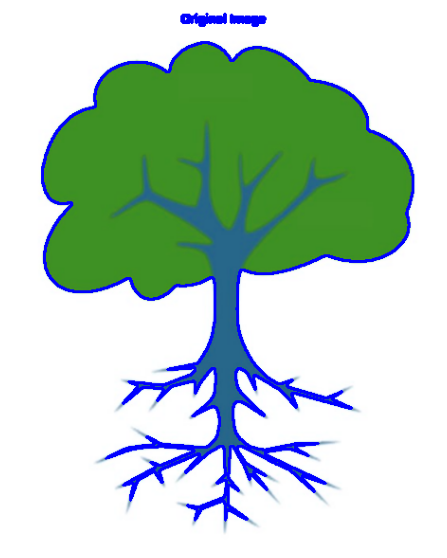

In [17]:
# Find and draw contours

cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

img_cpy3 = img.copy()

cv2.drawContours(img_cpy3,contours,-1,(0,0,255),2)

show_image(img_cpy3)